In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from scipy.stats import shapiro
import statistics as stats
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler

# Datasets

### Iris

In [ ]:
#cargar dataset
X, y = datasets.load_iris(return_X_y=True)

In [ ]:
print("X shape: ", X.shape, "\ny shape:", y.shape)

X shape:  (150, 4) 
y shape: (150,)


### Penguins

In [ ]:
penguins = pd.read_csv("/content/drive/MyDrive/AAD/penguins.csv")

In [ ]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [ ]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


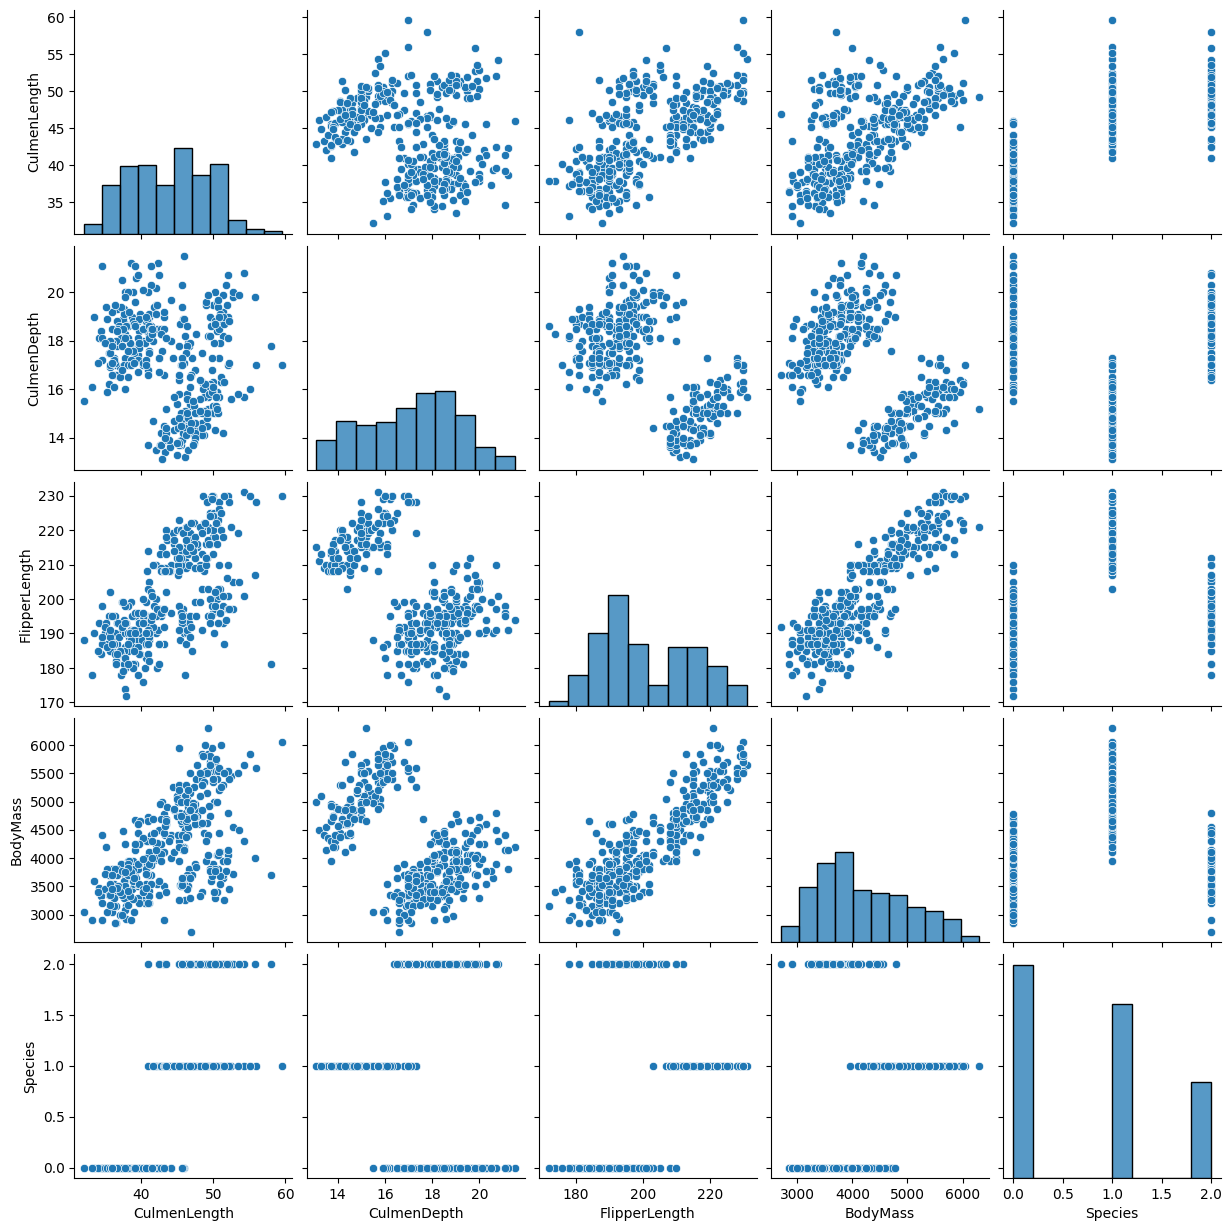

In [ ]:
sns.pairplot(penguins)

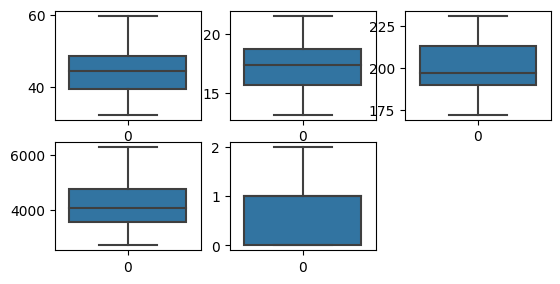

In [ ]:
#Boxplot
for i, column in enumerate(penguins.columns, 1):
  plt.subplot(3,3,i)
  sns.boxplot(penguins[column])

In [ ]:
def distribution_analysis(x,column):
  skew = x[column].skew(skipna = True)
  kurtosis = x[column].kurtosis(skipna = True)
  normality = shapiro(x[column])
  if (skew >= -0.5 and skew <= 0.5):
    print(f"La distribucion de {column} es aceptablemente simetrica (skew:{skew}).\n")
  if (skew >= -1 and skew < -0.5):
    print(f"La distribucion de {column} es moderadamente oblicua a la derecha (skew:{skew}).\n")
  if (skew > 0.5 and skew <= 1):
    print(f"La distribucion de {column} es moderadamente oblicua a la izquierda (skew:{skew}).\n")
  if (skew < -1):
    print(f"La distribucion de {column} es considerablemente oblicua a la derecha (skew:{skew}).\n")
  if (skew > 1):
    print(f"La distribucion de {column} es considerablemente oblicua a la izquierda (skew:{skew}).\n")
  
  if (kurtosis > 3):
    print(f"La distribucion de {column} es leptokurtica (kurtosis:{kurtosis}).\n")
  if (kurtosis == 3):
    print(f"La distribucion de {column} es mesokurtica (kurtosis:{kurtosis}).\n")
  else:
    print(f"La distribucion de {column} es platokurtica (kurtosis:{kurtosis}).\n")

  if (normality[1] > 0.05):
    print(f"El p-value ({normality[1]}) de la prueba shapiro-wilk es mayor al nivel de significancia de 0.05, por lo tanto falla en rechazar la hipotesis nula, la muestra porviene de una distribucion normal.\n\n")
  if (normality[1] < 0.05):
    print(f"El p-value ({normality[1]}) de la prueba shapiro-wilk es menor al nivel de significancia de 0.05, por lo tanto se rechaza la hipotesis nula, la muestra no porviene de una distribucion normal.\n\n")

In [ ]:
from numpy.core.fromnumeric import mean
#Kurtosis, Skewness, Normality
for i, column in enumerate(penguins.columns, 1):
  distribution_analysis(penguins, column)
  print(f"Media: {mean(penguins[column])}",f"\nModa: {stats.mode(penguins[column])}", f"\nMedian: {stats.median(penguins[column])}\n\n")

La distribucion de CulmenLength es aceptablemente simetrica (skew:0.05311806699132413).

La distribucion de CulmenLength es platokurtica (kurtosis:-0.8760269663060134).

El p-value (1.0) de la prueba shapiro-wilk es mayor al nivel de significancia de 0.05, por lo tanto falla en rechazar la hipotesis nula, la muestra porviene de una distribucion normal.


Media: 43.9219298245614 
Moda: 41.1 
Median: 44.45


La distribucion de CulmenDepth es aceptablemente simetrica (skew:-0.14346462519436454).

La distribucion de CulmenDepth es platokurtica (kurtosis:-0.9068660903732542).

El p-value (1.0) de la prueba shapiro-wilk es mayor al nivel de significancia de 0.05, por lo tanto falla en rechazar la hipotesis nula, la muestra porviene de una distribucion normal.


Media: 17.151169590643274 
Moda: 17.0 
Median: 18.0


La distribucion de FlipperLength es aceptablemente simetrica (skew:0.3456818328687695).

La distribucion de FlipperLength es platokurtica (kurtosis:-0.9842728861838852).

El p-valu

In [ ]:
#preprocesamiento
#Handling null values
penguins = penguins.fillna(penguins.mean())

In [ ]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.10000,18.70000,181.000000,3750.000000,0
1,39.50000,17.40000,186.000000,3800.000000,0
2,40.30000,18.00000,195.000000,3250.000000,0
3,43.92193,17.15117,200.915205,4201.754386,0
4,36.70000,19.30000,193.000000,3450.000000,0


In [ ]:
X_penguin = penguins.drop(columns=["Species"])
y_penguin = penguins.Species

In [ ]:
X_penguin.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [ ]:
y_penguin.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
X_penguin = X_penguin.to_numpy()
y_penguin = y_penguin.to_numpy()

## Tarea 4.1

In [ ]:
class Euclidean_Classifier:
  def __init__(self) -> None:
    self.m = dict()
    self.classes = None
    self.distances = dict()

  def fit(self,X,y):
    self.classes = set(y)
    for cls in self.classes:
      cls_indices = np.where(y == cls)
      x_cls = np.take(X, cls_indices, axis= 0)
      m_vector = np.sum(x_cls[0], axis=0) / len(x_cls[0])
      self.m[cls] = np.array(m_vector)

  def predict(self, z):
    for cls in self.classes:
      self.distances[cls] = self.euclidean(z, self.m[cls])

    dist = list(self.distances.values())
    #print(dist)
    minimum = min(dist)
    for i in self.distances.keys():
      if self.distances[i] == minimum:
        return i

  def predictions(self, z):
    temp = []
    for i in range(len(z)):
      temp.append(self.predict(z[i]))
    return temp

  def euclidean(self,x, y):
    temp = []
    for i in range(len(x)):
      temp.append((x[i] - y[i])**2)
    return sum(temp)**(1/2)

    

In [ ]:
def confusion_matrix(predictions, y, model):
  p1r1 = 0
  p1r2 = 0
  p1r3 = 0
  p2r1 = 0
  p2r2 = 0
  p2r3 = 0
  p3r1 = 0
  p3r2 = 0
  p3r3 = 0
  classes = list(set(y))
  errors = 0
  for i in range(len(predictions)):
    if predictions[i] == y[i] and y[i] == classes[0]:
      p1r1 += 1

    if predictions[i] != y[i] and predictions[i] == classes[0] and y[i] == classes[1]:
      p1r2 += 1
      errors += 1

    if predictions[i] != y[i] and predictions[i] == classes[0] and y[i] == classes[2]:
      p1r3 += 1
      errors += 1

    if predictions[i] != y[i] and predictions[i] == classes[1] and y[i] == classes[0]:
      p2r1 += 1
      errors += 1

    if predictions[i] == y[i] and y[i] == classes[1]:
      p2r2 += 1

    if predictions[i] != y[i] and predictions[i] == classes[1] and y[i] == classes[2]:
      p2r3 += 1
      errors += 1

    if predictions[i] != y[i] and predictions[i] == classes[2] and y[i] == classes[0]:
      p3r1 += 1
      errors += 1
    
    if predictions[i] != y[i] and predictions[i] == classes[2] and y[i] == classes[1]:
      p3r2 += 1
      errors += 1

    if predictions[i] == y[i] and y[i] == classes[1]:
      p3r3 += 1

  table = [["P1",p1r1,p1r2,p1r3],["P2",p2r1,p2r2,p2r3],["P3",p3r1,p3r2,p3r3]]
  headers = ["Predicted Classes", "R1", "R2", "R2"]
  return (tabulate(table,headers), errors/len(predictions), 1 - errors/len(predictions))


### Iris

Resubstitution Error

In [ ]:
#Lista para guardar accuracy
iris_accuracies = []

model = Euclidean_Classifier()
model.fit(X, y)
predictions = model.predictions(X)

mat, re_iris, accuracy_re_iris = confusion_matrix(predictions,y,model)
iris_accuracies.append(accuracy_re_iris)

In [ ]:
print(mat,f"\n\nError:{re_iris}\nAccuracy:{accuracy_re_iris}")

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     50     0     0
P2                      0    46     7
P3                      0     4    46 

Error:0.07333333333333333
Accuracy:0.9266666666666666


Hold Out

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
#Hold Out
model_ho = Euclidean_Classifier()
model_ho.fit(X_train, y_train)
predictions_ho = model_ho.predictions(X_test)

In [ ]:
mat_ho, hoe_iris, accuracy_hoe_iris = confusion_matrix(predictions_ho,y_test,model_ho)
print(mat,f"\n\nError:{hoe_iris}\nAccuracy:{accuracy_hoe_iris}")
iris_accuracies.append(accuracy_hoe_iris)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     50     0     0
P2                      0    46     7
P3                      0     4    46 

Error:0.08888888888888889
Accuracy:0.9111111111111111


In [ ]:
#Leave One Out
loo = LeaveOneOut()
loo.get_n_splits(X)
errors = 0

for i, (train_index, test_index) in enumerate(loo.split(X,y)):
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X, train_index, axis= 0), np.take(y, train_index, axis=0))
  predictions = model.predictions(np.take(X, test_index, axis= 0))
  if predictions[0] != np.take(y, test_index, axis=0):
      errors += 1
  print(f"Predicted: {predictions[0]} Real: {np.take(y, test_index, axis=0)[0]}")

looe_iris, accuracy_looe_iris = (errors/X.shape[0], 1-errors/X.shape[0])
print(f"\n\nError:{looe_iris}\nAccuracy:{accuracy_looe_iris}")
iris_accuracies.append(accuracy_looe_iris)

Fold 0:
Predicted: 0 Real: 0
Fold 1:
Predicted: 0 Real: 0
Fold 2:
Predicted: 0 Real: 0
Fold 3:
Predicted: 0 Real: 0
Fold 4:
Predicted: 0 Real: 0
Fold 5:
Predicted: 0 Real: 0
Fold 6:
Predicted: 0 Real: 0
Fold 7:
Predicted: 0 Real: 0
Fold 8:
Predicted: 0 Real: 0
Fold 9:
Predicted: 0 Real: 0
Fold 10:
Predicted: 0 Real: 0
Fold 11:
Predicted: 0 Real: 0
Fold 12:
Predicted: 0 Real: 0
Fold 13:
Predicted: 0 Real: 0
Fold 14:
Predicted: 0 Real: 0
Fold 15:
Predicted: 0 Real: 0
Fold 16:
Predicted: 0 Real: 0
Fold 17:
Predicted: 0 Real: 0
Fold 18:
Predicted: 0 Real: 0
Fold 19:
Predicted: 0 Real: 0
Fold 20:
Predicted: 0 Real: 0
Fold 21:
Predicted: 0 Real: 0
Fold 22:
Predicted: 0 Real: 0
Fold 23:
Predicted: 0 Real: 0
Fold 24:
Predicted: 0 Real: 0
Fold 25:
Predicted: 0 Real: 0
Fold 26:
Predicted: 0 Real: 0
Fold 27:
Predicted: 0 Real: 0
Fold 28:
Predicted: 0 Real: 0
Fold 29:
Predicted: 0 Real: 0
Fold 30:
Predicted: 0 Real: 0
Fold 31:
Predicted: 0 Real: 0
Fold 32:
Predicted: 0 Real: 0
Fold 33:
Predicted: 

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
  errors = 0
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X, train_index, axis= 0), np.take(y, train_index, axis=0))
  predictions = model.predictions(np.take(X, test_index, axis= 0))
  real = np.take(y, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
iris_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.0
Fold 1:
Error del Fold: 0.0
Fold 2:
Error del Fold: 0.0
Fold 3:
Error del Fold: 0.13333333333333333
Fold 4:
Error del Fold: 0.0
Fold 5:
Error del Fold: 0.2
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.2
Fold 8:
Error del Fold: 0.13333333333333333
Fold 9:
Error del Fold: 0.06666666666666667


Error promedio: 0.07333333333333333
Accuracy: 0.9266666666666666


### Penguins

Resubstitution Error

In [ ]:
penguin_accuracies = []
penguin_accuracies_s = []

model_penguin = Euclidean_Classifier()
model_penguin.fit(X_penguin, y_penguin)
predictions = model_penguin.predictions(X_penguin)

mat_penguin, re_p, accuracy_re_p = confusion_matrix(predictions,y_penguin,model_penguin)
penguin_accuracies.append(accuracy_re_p)

In [ ]:
print(mat_penguin,f"\n\nError:{re_p}\nAccuracy:{accuracy_re_p}")

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     81     0    36
P2                     11   109     4
P3                     60    15   109 

Error:0.36627906976744184
Accuracy:0.6337209302325582


In [ ]:
#Scaling
model_penguin_scaled = Euclidean_Classifier()

scaler = MinMaxScaler().fit(X_penguin)
X_penguin_scaled = scaler.transform(X_penguin)

model_penguin_scaled.fit(X_penguin_scaled, y_penguin)
predictions = model_penguin_scaled.predictions(X_penguin_scaled)

mat_penguin_s, re_p_s, accuracy_re_p_s = confusion_matrix(predictions,y_penguin,model_penguin_scaled)
print(mat_penguin_s,f"\n\nError:{re_p_s}\nAccuracy:{accuracy_re_p_s}")
penguin_accuracies_s.append(accuracy_re_p_s)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                    145     0     5
P2                      0   123     0
P3                      7     1   123 

Error:0.0377906976744186
Accuracy:0.9622093023255814


Hold Out

In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train_p.shape,X_test_p.shape,y_train_p.shape,y_test_p.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
#Hold Out
model_ho_p = Euclidean_Classifier()
model_ho_p.fit(X_train_p, y_train_p)
predictions_ho_p = model_ho_p.predictions(X_test_p)

In [ ]:
mat_ho_p, hoe_p, accuracy_hoe_p = confusion_matrix(predictions_ho_p,y_test_p,model_ho_p)
print(mat_ho_p,f"\n\nError:{hoe_p}\nAccuracy:{accuracy_hoe_p}")
penguin_accuracies.append(accuracy_hoe_p)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     16     0     0
P2                      0    17     3
P3                      0     1    17 

Error:0.08888888888888889
Accuracy:0.9111111111111111


In [ ]:
#Hold Out Scale
scaler = MinMaxScaler().fit(X_train_p)

X_train_p_scaled = scaler.transform(X_train_p)

model_ho_p_s = Euclidean_Classifier()
model_ho_p_s.fit(X_train_p_scaled, y_train_p)

X_test_p_scaled = scaler.transform(X_test_p)
predictions_ho_p_s = model_ho_p_s.predictions(X_test_p_scaled)


mat_ho_p_s, hoe_p_s, accuracy_hoe_p_s = confusion_matrix(predictions_ho_p_s,y_test_p,model_ho_p_s)
print(mat_ho_p_s,f"\n\nError:{hoe_p_s}\nAccuracy:{accuracy_hoe_p_s}")
penguin_accuracies_s.append(accuracy_hoe_p_s)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     16     0     0
P2                      0    17     1
P3                      0     1    17 

Error:0.044444444444444446
Accuracy:0.9555555555555556


Leave One Out

In [ ]:
#Leave One Out
loo = LeaveOneOut()
loo.get_n_splits(X_penguin)
errors = 0

for i, (train_index, test_index) in enumerate(loo.split(X_penguin,y_penguin)):
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X_penguin, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predictions(np.take(X_penguin, test_index, axis= 0))
  if predictions[0] != np.take(y_penguin, test_index, axis=0):
      errors += 1
  print(f"Predicted: {predictions[0]} Real: {np.take(y_penguin, test_index, axis=0)[0]}")

looe_p, accuracy_looe_p = (errors/X.shape[0], 1-errors/X.shape[0])
print(f"\n\nError:{looe_p}\nAccuracy:{accuracy_looe_p}")
penguin_accuracies.append(accuracy_looe_p)

Fold 0:
Predicted: 2 Real: 0
Fold 1:
Predicted: 2 Real: 0
Fold 2:
Predicted: 0 Real: 0
Fold 3:
Predicted: 2 Real: 0
Fold 4:
Predicted: 0 Real: 0
Fold 5:
Predicted: 0 Real: 0
Fold 6:
Predicted: 0 Real: 0
Fold 7:
Predicted: 1 Real: 0
Fold 8:
Predicted: 0 Real: 0
Fold 9:
Predicted: 2 Real: 0
Fold 10:
Predicted: 0 Real: 0
Fold 11:
Predicted: 0 Real: 0
Fold 12:
Predicted: 0 Real: 0
Fold 13:
Predicted: 2 Real: 0
Fold 14:
Predicted: 2 Real: 0
Fold 15:
Predicted: 0 Real: 0
Fold 16:
Predicted: 0 Real: 0
Fold 17:
Predicted: 1 Real: 0
Fold 18:
Predicted: 0 Real: 0
Fold 19:
Predicted: 2 Real: 0
Fold 20:
Predicted: 0 Real: 0
Fold 21:
Predicted: 0 Real: 0
Fold 22:
Predicted: 2 Real: 0
Fold 23:
Predicted: 2 Real: 0
Fold 24:
Predicted: 2 Real: 0
Fold 25:
Predicted: 2 Real: 0
Fold 26:
Predicted: 0 Real: 0
Fold 27:
Predicted: 0 Real: 0
Fold 28:
Predicted: 0 Real: 0
Fold 29:
Predicted: 2 Real: 0
Fold 30:
Predicted: 0 Real: 0
Fold 31:
Predicted: 2 Real: 0
Fold 32:
Predicted: 0 Real: 0
Fold 33:
Predicted: 

In [ ]:
#Leave One Out
scaler = MinMaxScaler().fit(X_penguin)
X_penguin_scaled = scaler.transform(X_penguin)

loo = LeaveOneOut()
loo.get_n_splits(X_penguin_scaled)
errors = 0

for i, (train_index, test_index) in enumerate(loo.split(X_penguin_scaled,y_penguin)):
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X_penguin_scaled, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predictions(np.take(X_penguin_scaled, test_index, axis= 0))
  if predictions[0] != np.take(y_penguin, test_index, axis=0):
      errors += 1
  print(f"Predicted: {predictions[0]} Real: {np.take(y_penguin, test_index, axis=0)[0]}")

looe_p_s, accuracy_looe_p_s = (errors/X.shape[0], 1-errors/X.shape[0])
print(f"\n\nError:{looe_p_s}\nAccuracy:{accuracy_looe_p_s}")
penguin_accuracies_s.append(accuracy_looe_p_s)

Fold 0:
Predicted: 0 Real: 0
Fold 1:
Predicted: 0 Real: 0
Fold 2:
Predicted: 0 Real: 0
Fold 3:
Predicted: 2 Real: 0
Fold 4:
Predicted: 0 Real: 0
Fold 5:
Predicted: 0 Real: 0
Fold 6:
Predicted: 0 Real: 0
Fold 7:
Predicted: 0 Real: 0
Fold 8:
Predicted: 0 Real: 0
Fold 9:
Predicted: 0 Real: 0
Fold 10:
Predicted: 0 Real: 0
Fold 11:
Predicted: 0 Real: 0
Fold 12:
Predicted: 0 Real: 0
Fold 13:
Predicted: 0 Real: 0
Fold 14:
Predicted: 0 Real: 0
Fold 15:
Predicted: 0 Real: 0
Fold 16:
Predicted: 0 Real: 0
Fold 17:
Predicted: 0 Real: 0
Fold 18:
Predicted: 0 Real: 0
Fold 19:
Predicted: 2 Real: 0
Fold 20:
Predicted: 0 Real: 0
Fold 21:
Predicted: 0 Real: 0
Fold 22:
Predicted: 0 Real: 0
Fold 23:
Predicted: 0 Real: 0
Fold 24:
Predicted: 0 Real: 0
Fold 25:
Predicted: 0 Real: 0
Fold 26:
Predicted: 0 Real: 0
Fold 27:
Predicted: 0 Real: 0
Fold 28:
Predicted: 0 Real: 0
Fold 29:
Predicted: 0 Real: 0
Fold 30:
Predicted: 0 Real: 0
Fold 31:
Predicted: 0 Real: 0
Fold 32:
Predicted: 0 Real: 0
Fold 33:
Predicted: 

kfold

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X_penguin, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predictions(np.take(X_penguin, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_p, accuracy_kfolde_p = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_p}\nAccuracy: {accuracy_kfolde_p}")
penguin_accuracies.append(accuracy_kfolde_p)

Fold 0:
Error del Fold: 0.45714285714285713
Fold 1:
Error del Fold: 0.45714285714285713
Fold 2:
Error del Fold: 0.5142857142857142
Fold 3:
Error del Fold: 0.4857142857142857
Fold 4:
Error del Fold: 0.14705882352941177
Fold 5:
Error del Fold: 0.20588235294117646
Fold 6:
Error del Fold: 0.058823529411764705
Fold 7:
Error del Fold: 0.058823529411764705
Fold 8:
Error del Fold: 0.5588235294117647
Fold 9:
Error del Fold: 0.6176470588235294


Error promedio: 0.35613445378151265
Accuracy: 0.6438655462184874


In [ ]:
#10-fold
scaler = MinMaxScaler().fit(X_penguin)
X_penguin_scaled = scaler.transform(X_penguin)

kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin_scaled)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin_scaled,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = Euclidean_Classifier()
  model.fit(np.take(X_penguin_scaled, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predictions(np.take(X_penguin_scaled, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_p_s, accuracy_kfolde_p_s = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_p_s}\nAccuracy: {accuracy_kfolde_p_s}")
penguin_accuracies_s.append(accuracy_kfolde_p)

Fold 0:
Error del Fold: 0.05714285714285714
Fold 1:
Error del Fold: 0.02857142857142857
Fold 2:
Error del Fold: 0.02857142857142857
Fold 3:
Error del Fold: 0.11428571428571428
Fold 4:
Error del Fold: 0.0
Fold 5:
Error del Fold: 0.0
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.029411764705882353
Fold 8:
Error del Fold: 0.14705882352941177
Fold 9:
Error del Fold: 0.029411764705882353


Error promedio: 0.043445378151260504
Accuracy: 0.9565546218487395


## Tarea 4.2

### Iris

Resubstitution Error 1NN

In [ ]:
knn_iris_accuracies = []
model_one = KNeighborsClassifier(n_neighbors=1)
model_one.fit(X,y)
predictions = model_one.predict(X)

mat, re_iris, accuracy_re_iris = confusion_matrix(predictions,y,model_one)
print(mat,f"\n\nError:{re_iris}\nAccuracy:{accuracy_re_iris}")
knn_iris_accuracies.append(accuracy_re_iris)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                     50     0     0
P2                      0    50     0
P3                      0     0    50 

Error:0.0
Accuracy:1.0


10Folds 1NN

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(np.take(X, train_index, axis= 0), np.take(y, train_index, axis=0))
  predictions = model.predict(np.take(X, test_index, axis= 0))
  real = np.take(y, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_iris_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.0
Fold 1:
Error del Fold: 0.0
Fold 2:
Error del Fold: 0.0
Fold 3:
Error del Fold: 0.0
Fold 4:
Error del Fold: 0.13333333333333333
Fold 5:
Error del Fold: 0.06666666666666667
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.13333333333333333
Fold 8:
Error del Fold: 0.06666666666666667
Fold 9:
Error del Fold: 0.0


Error promedio: 0.04
Accuracy: 0.96


10Folds 3NN

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(np.take(X, train_index, axis= 0), np.take(y, train_index, axis=0))
  predictions = model.predict(np.take(X, test_index, axis= 0))
  real = np.take(y, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_iris_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.0
Fold 1:
Error del Fold: 0.0
Fold 2:
Error del Fold: 0.0
Fold 3:
Error del Fold: 0.0
Fold 4:
Error del Fold: 0.13333333333333333
Fold 5:
Error del Fold: 0.13333333333333333
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.13333333333333333
Fold 8:
Error del Fold: 0.13333333333333333
Fold 9:
Error del Fold: 0.0


Error promedio: 0.05333333333333333
Accuracy: 0.9466666666666667


### Penguins

Resubstitution Error 1NN

In [ ]:
knn_penguin_accuracies = []
model_one = KNeighborsClassifier(n_neighbors=1)
model_one.fit(X_penguin,y_penguin)
predictions = model_one.predict(X_penguin)

mat, re_iris, accuracy_re_iris = confusion_matrix(predictions,y_penguin,model_one)
print(mat,f"\n\nError:{re_iris}\nAccuracy:{accuracy_re_iris}")
knn_penguin_accuracies.append(accuracy_re_iris)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                    152     1     0
P2                      0   123     0
P3                      0     0   123 

Error:0.0029069767441860465
Accuracy:0.997093023255814


In [ ]:
knn_penguin_s_accuracies = []

scaler = MinMaxScaler().fit(X_penguin)
X_penguin_scaled = scaler.transform(X_penguin)

model_one = KNeighborsClassifier(n_neighbors=1)
model_one.fit(X_penguin_scaled,y_penguin)
predictions = model_one.predict(X_penguin_scaled)

mat, re_iris, accuracy_re_iris = confusion_matrix(predictions,y_penguin,model_one)
print(mat,f"\n\nError:{re_iris}\nAccuracy:{accuracy_re_iris}")
knn_penguin_s_accuracies.append(accuracy_re_iris)

Predicted Classes      R1    R2    R2
-------------------  ----  ----  ----
P1                    152     1     0
P2                      0   123     0
P3                      0     0   123 

Error:0.0029069767441860465
Accuracy:0.997093023255814


10Folds 1NN

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(np.take(X_penguin, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predict(np.take(X_penguin, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_penguin_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.2571428571428571
Fold 1:
Error del Fold: 0.14285714285714285
Fold 2:
Error del Fold: 0.17142857142857143
Fold 3:
Error del Fold: 0.14285714285714285
Fold 4:
Error del Fold: 0.17647058823529413
Fold 5:
Error del Fold: 0.08823529411764706
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.029411764705882353
Fold 8:
Error del Fold: 0.5
Fold 9:
Error del Fold: 0.4411764705882353


Error promedio: 0.1949579831932773
Accuracy: 0.8050420168067227


In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin_scaled)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin_scaled,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(np.take(X_penguin_scaled, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predict(np.take(X_penguin_scaled, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_penguin_s_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.05714285714285714
Fold 1:
Error del Fold: 0.0
Fold 2:
Error del Fold: 0.02857142857142857
Fold 3:
Error del Fold: 0.02857142857142857
Fold 4:
Error del Fold: 0.0
Fold 5:
Error del Fold: 0.0
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.029411764705882353
Fold 8:
Error del Fold: 0.11764705882352941
Fold 9:
Error del Fold: 0.058823529411764705


Error promedio: 0.03201680672268907
Accuracy: 0.967983193277311


10Folds 3NN

In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(np.take(X_penguin, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predict(np.take(X_penguin, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_penguin_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.14285714285714285
Fold 1:
Error del Fold: 0.2
Fold 2:
Error del Fold: 0.22857142857142856
Fold 3:
Error del Fold: 0.17142857142857143
Fold 4:
Error del Fold: 0.20588235294117646
Fold 5:
Error del Fold: 0.08823529411764706
Fold 6:
Error del Fold: 0.08823529411764706
Fold 7:
Error del Fold: 0.029411764705882353
Fold 8:
Error del Fold: 0.7647058823529411
Fold 9:
Error del Fold: 0.7058823529411765


Error promedio: 0.26252100840336134
Accuracy: 0.7374789915966387


In [ ]:
#10-fold
kf = KFold(n_splits=10)
kf.get_n_splits(X_penguin_scaled)
fold_errors = []
for i, (train_index, test_index) in enumerate(kf.split(X_penguin_scaled,y_penguin)):
  errors = 0
  print(f"Fold {i}:")
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(np.take(X_penguin_scaled, train_index, axis= 0), np.take(y_penguin, train_index, axis=0))
  predictions = model.predict(np.take(X_penguin_scaled, test_index, axis= 0))
  real = np.take(y_penguin, test_index, axis=0)
  for i in range(len(predictions)):
    if predictions[i] != real[i]:
      errors += 1
  fold_errors.append(errors/len(predictions))
  print(f"Error del Fold: {errors/len(predictions)}")

kfolde_iris, accuracy_kfolde_iris = (np.mean(fold_errors), 1 - np.mean(fold_errors))
print(f"\n\nError promedio: {kfolde_iris}\nAccuracy: {accuracy_kfolde_iris}")
knn_penguin_s_accuracies.append(accuracy_kfolde_iris)

Fold 0:
Error del Fold: 0.02857142857142857
Fold 1:
Error del Fold: 0.0
Fold 2:
Error del Fold: 0.02857142857142857
Fold 3:
Error del Fold: 0.0
Fold 4:
Error del Fold: 0.0
Fold 5:
Error del Fold: 0.0
Fold 6:
Error del Fold: 0.0
Fold 7:
Error del Fold: 0.029411764705882353
Fold 8:
Error del Fold: 0.14705882352941177
Fold 9:
Error del Fold: 0.029411764705882353


Error promedio: 0.026302521008403364
Accuracy: 0.9736974789915966


In [ ]:
headers = ["", "Iris", "Penguins","Penguins Scaled"]
table = [
    ["Euclidean Resubstitution", iris_accuracies[0],penguin_accuracies[0],penguin_accuracies_s[0]],
    ["Euclidean LOO", iris_accuracies[1],penguin_accuracies[1],penguin_accuracies_s[1]],
    ["Euclidean Hold Out", iris_accuracies[2],penguin_accuracies[2],penguin_accuracies_s[2]],
    ["Euclidean KFold", iris_accuracies[3],penguin_accuracies[3],penguin_accuracies_s[3]],
    "------------------------------------------------------",
    ["KNN(1) Resubstitution", knn_iris_accuracies[0], knn_penguin_accuracies[0], knn_penguin_s_accuracies[0]],
    ["KNN(1) KFold", knn_iris_accuracies[1], knn_penguin_accuracies[1], knn_penguin_s_accuracies[1]],
    "------------------------------------------------------",
    ["KNN(3) KFold", knn_iris_accuracies[2], knn_penguin_accuracies[2], knn_penguin_s_accuracies[2]]
    ]

print(tabulate(table,headers,floatfmt=(".3f",".3f",".3f"), tablefmt="github"))

|                          | Iris               | Penguins            | Penguins Scaled    |
|--------------------------|--------------------|---------------------|--------------------|
| Euclidean Resubstitution | 0.9266666666666666 | 0.6337209302325582  | 0.9622093023255814 |
| Euclidean LOO            | 0.9111111111111111 | 0.9111111111111111  | 0.9555555555555556 |
| Euclidean Hold Out       | 0.92               | 0.15333333333333332 | 0.9133333333333333 |
| Euclidean KFold          | 0.9266666666666666 | 0.6438655462184874  | 0.6438655462184874 |
| -                        | -                  | -                   | -                  |
| KNN(1) Resubstitution    | 1.0                | 0.997093023255814   | 0.997093023255814  |
| KNN(1) KFold             | 0.96               | 0.8050420168067227  | 0.967983193277311  |
| -                        | -                  | -                   | -                  |
| KNN(3) KFold             | 0.9466666666666667 | 0.7374789915966387  